In [732]:
import numpy as np   
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
import pandas as pd    
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [733]:
concrete = pd.read_csv("concrete.csv") 

In [734]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# 1A) Univariate analysis

In [736]:
concrete.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [737]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243B165E518>,
      dtype=object)

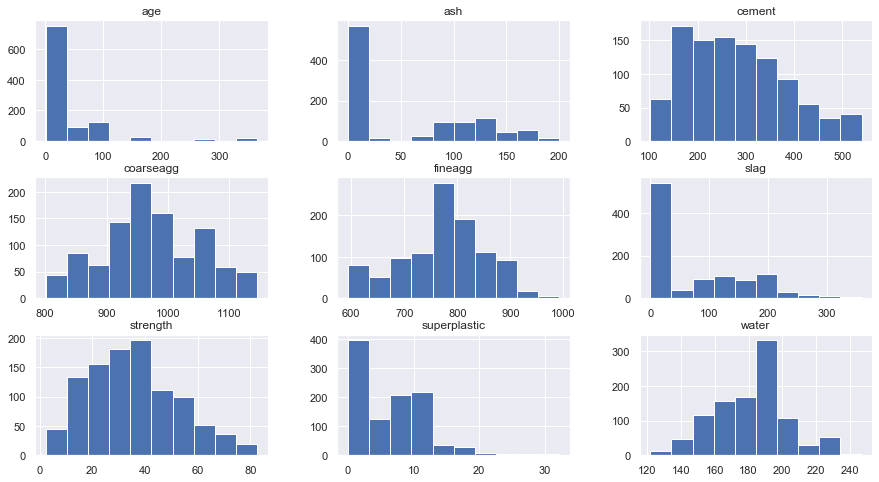

In [738]:
concrete.hist(figsize=(15,8))

# From the graphs below, we can see age, ash, and superplastic have outliers.

# 1B) Multivariate analysis

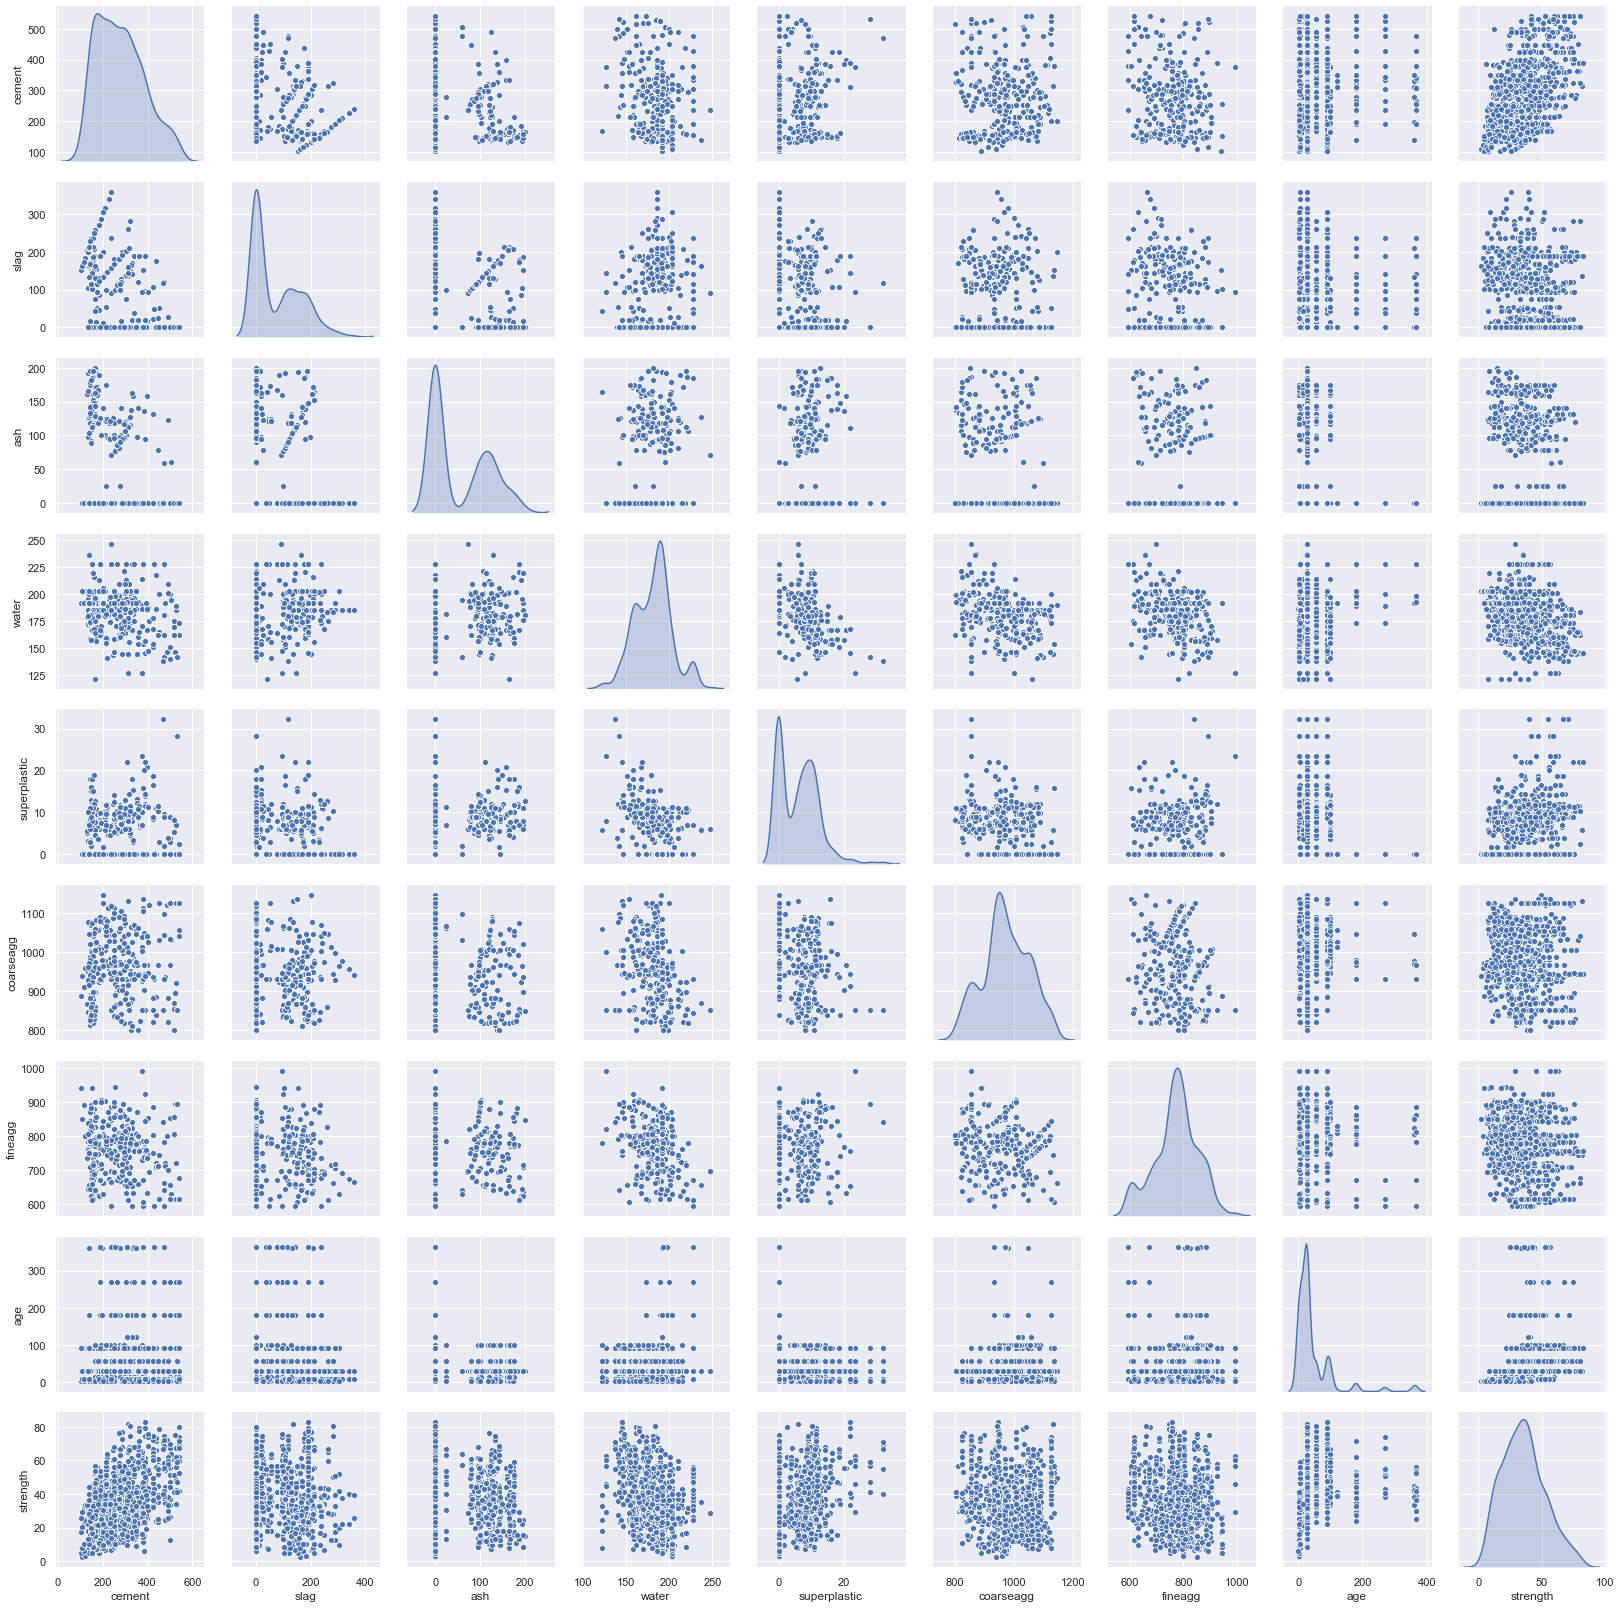

In [739]:
sns.pairplot(concrete, diag_kind = 'kde')

# From the graph below:
# We can see the chances of minimum 3 and maximum 15 (3*5) cluster formation
# Close observation between 'strength' and other attributes indicate the relationship is not really linear
# Strength doesn't show strong relaion with any attributes specially with ash, superplastic, corseagg and fineagg.

In [740]:
concrete_z = concrete.apply(zscore)

In [741]:
concrete_z.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,-3.858833e-16,1.000486,-1.715253,-0.850053,-0.079152,0.658961,2.477915
slag,1030.0,9.593189e-18,1.000486,-0.856888,-0.856888,-0.601778,0.800745,3.310675
ash,1030.0,3.634633e-16,1.000486,-0.847144,-0.847144,-0.847144,1.002278,2.281084
water,1030.0,-2.014570e-16,1.000486,-2.800211,-0.780894,0.160829,0.488793,3.065647
superplastic,1030.0,1.103756e-16,1.000486,-1.039143,-1.039143,0.032715,0.669131,4.353642
coarseagg,1030.0,7.116206e-16,1.000486,-2.212138,-0.526517,-0.063294,0.726761,2.214224
fineagg,1030.0,9.537139e-16,1.000486,-2.240917,-0.531970,0.073867,0.629166,2.733062
age,1030.0,3.794160e-17,1.000486,-0.707359,-0.612331,-0.279733,0.163731,5.057677
strength,1030.0,-3.729487e-17,1.000486,-2.005552,-0.725131,-0.082225,0.617874,2.801717


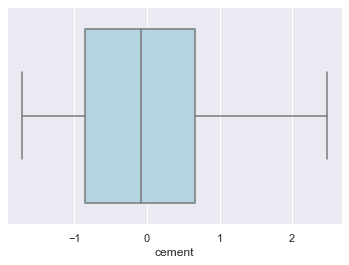

In [742]:
# Plotting box plots to see presence of outliers after scaling.
# From the graphs below it can be seen that few of the parameters still have outliers.

sns.boxplot(concrete_z.cement, color='lightblue')

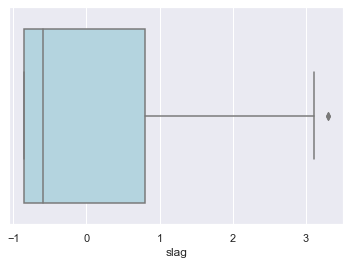

In [743]:
sns.boxplot(concrete_z.slag, color='lightblue')

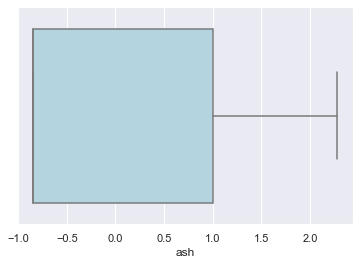

In [744]:
sns.boxplot(concrete_z.ash, color='lightblue')

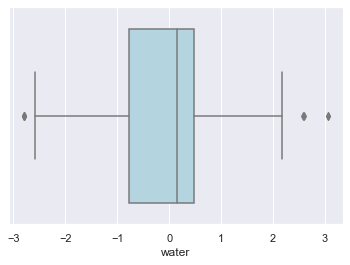

In [745]:
sns.boxplot(concrete_z.water, color='lightblue')

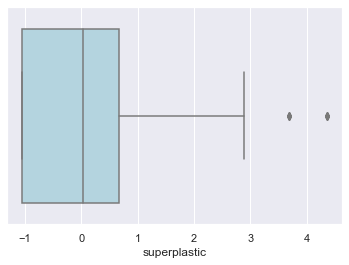

In [746]:
sns.boxplot(concrete_z.superplastic, color='lightblue')

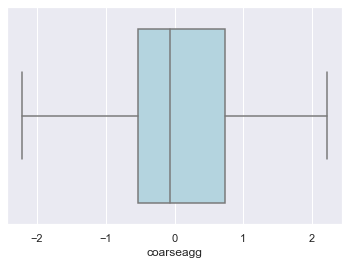

In [747]:
sns.boxplot(concrete_z.coarseagg, color='lightblue')

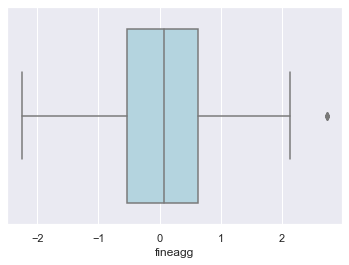

In [748]:
sns.boxplot(concrete_z.fineagg, color='lightblue')

# 1C) Pick one strategy to address the presence outliers and missing values and perform necessary imputation

In [749]:
# Removing outliers from scaled dataframe concrete_z

Q1 = concrete_z.quantile(0.25)
Q3 = concrete_z.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
concrete_z1 = concrete_z[~((concrete_z < (Q1 - 1.5 * IQR)) |(concrete_z > (Q3 + 1.5 * IQR))).any(axis=1)]
concrete_z1.shape

# We can see reduced number of rows, as the outliers have been removed.
# Since the number of outliers as seen from the box plot above was very few, we will use concrete_z throught the modelling.

cement          1.509014
slag            1.657633
ash             1.849422
water           1.269687
superplastic    1.708274
coarseagg       1.253278
fineagg         1.161136
age             0.776063
strength        1.343005
dtype: float64


(941, 9)

In [750]:
concrete_z1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,941.0,-0.051722,0.975420,-1.715253,-0.869918,-0.245730,0.649387,2.477915
slag,941.0,-0.000408,1.001397,-0.856888,-0.856888,-0.624970,0.824516,3.110066
ash,941.0,0.059901,1.006223,-0.847144,-0.847144,-0.847144,1.002278,2.281084
water,941.0,-0.044473,0.878425,-2.556581,-0.780894,0.104607,0.488793,2.175461
superplastic,941.0,0.007157,0.894484,-1.039143,-1.039143,0.133202,0.685878,2.662116
coarseagg,941.0,0.024311,0.999104,-2.212138,-0.526517,-0.063294,0.747348,2.214224
fineagg,941.0,0.037079,0.936833,-2.240917,-0.406560,0.080107,0.606705,2.139079
age,941.0,-0.210423,0.452313,-0.707359,-0.612331,-0.279733,-0.279733,1.177364
strength,941.0,-0.055716,0.993706,-2.005552,-0.789810,-0.144809,0.528341,2.610073


# 2a) Identify opportunities (if any) to create a composite feature, drop a feature

In [751]:
# From the pairplot it was inferred that strength did not show strong correlation with any features, hence no choice to create
# composite feature.
# However lets do a correlation chart to see if a feature can be created.

concrete.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


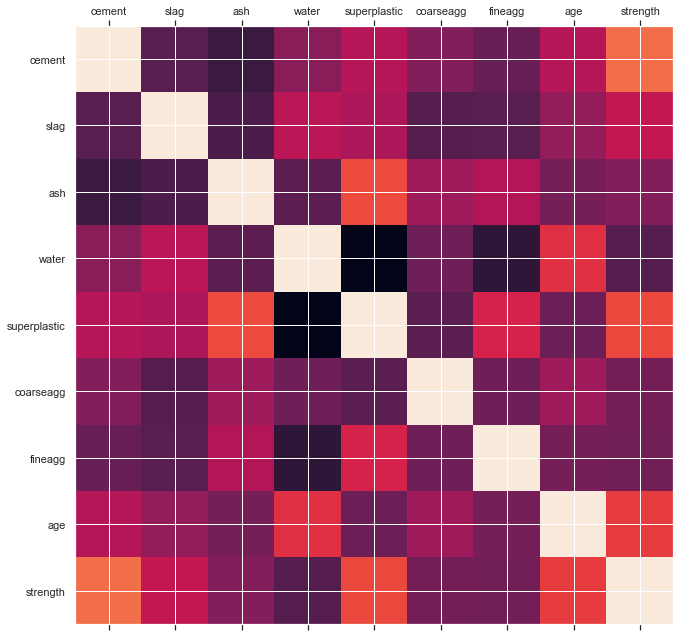

In [752]:
#  For correlation to be presented in graphical representation, below is the function

def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(concrete)

# In the plot below, yellow colour represents maximum correlation and blue colour represents minimum correlation. 

# It is confirmed that no composite feature is possible here, hence we will work with the features we have.

# 2b) Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree

In [753]:
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it

X = concrete_z.drop('strength' , axis = 1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y = concrete_z[['strength']]

In [754]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [755]:
# Invoking the LinearRegression function and finding the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [756]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.7917080306678752
The coefficient for slag is 0.5620608749496462
The coefficient for ash is 0.34747677102632063
The coefficient for water is -0.13186138372514944
The coefficient for superplastic is 0.13449876840644523
The coefficient for coarseagg is 0.11183689241537578
The coefficient for fineagg is 0.17370080312287323
The coefficient for age is 0.4175909779025137


In [757]:
regression_model.score(X_train, y_train)

0.6031487540630229

In [758]:
# Creating a regularized RIDGE model and note the coefficients

ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.78652136  0.55696657  0.34291358 -0.13534196  0.13450497  0.10831507
   0.16918324  0.41713594]]


In [759]:
# Creating a regularized LASSO model and noting the coefficients

lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.39456594  0.14777481  0.         -0.11823668  0.19361099 -0.
 -0.          0.2543608 ]


In [760]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.6031487540630229
0.6339136715208276


In [761]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.603144790939098
0.6340333563625518


In [762]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.5215627623725142
0.51856614888699


In [763]:
# More or less similar results but with less complex models.  Complexity is a function of variables and coefficients
# In Lasso, we achieved the poorest result, Ridge and Regresion showed similar results
# But still the result is not upto the mark.
# Hence, we will now see the performance with polynomial model

In [764]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [765]:
X_poly = poly.fit_transform(concrete_z)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 46)

In [766]:
## Fitting a simple non regularized linear model on poly features

regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[-9.72508189e-18  1.43285771e-15  1.98814526e-15  7.29170837e-16
  3.01027752e-16  4.77916215e-16  3.24110266e-16  3.14560195e-16
  7.31133362e-16  1.00000000e+00  2.79567224e-16  2.31663896e-16
 -1.03337908e-15 -6.54791721e-16 -4.30971653e-16 -4.90729375e-16
  7.26498057e-16 -1.05679367e-16 -2.69888487e-16 -4.96039708e-16
 -3.58518793e-16 -1.11059041e-16  1.30541919e-16  3.84397812e-16
 -3.76969518e-16 -4.08877198e-16 -5.79904855e-16 -3.53027229e-16
 -3.35547197e-16  3.49308021e-16 -2.03474363e-16  2.36468829e-16
 -5.24352602e-17 -2.70376274e-16  3.65157680e-16  3.81728982e-17
  8.36288428e-17  3.62528578e-16 -3.12024465e-16 -1.80410727e-16
  2.36251444e-16 -2.23393984e-16 -1.59413818e-16  7.32481447e-16
  1.39274083e-16 -1.88286004e-16]


In [767]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_)) 

# Magnitues are huge

Ridge model: [[ 0.00000000e+00  2.04631255e-03  1.64332286e-03  1.18197132e-03
  -6.55719173e-05  5.43324039e-04  3.98401174e-04  4.47837636e-04
   2.49763198e-03  9.97543219e-01  6.50042499e-05  4.96145177e-04
   2.88549360e-04  2.90690639e-04  3.83128422e-04  6.55715673e-04
   5.08601169e-04  8.40093160e-05  4.23220561e-04  2.50357078e-04
   3.73349712e-04  2.46220336e-04  5.54470563e-04  5.70313083e-04
   4.71878500e-05 -5.44952644e-05  5.74426633e-05  2.13679620e-04
   4.77822264e-04  1.21506348e-03 -3.92476456e-04  2.40806976e-04
  -5.62194748e-05 -2.90070528e-05  4.02242591e-04 -7.07329322e-04
   3.21284648e-04  3.43782724e-04  9.08093432e-04 -4.12315109e-04
   1.82469371e-04  4.11371838e-04 -3.59965860e-04  4.41553809e-04
  -7.41435381e-04 -8.18689266e-04]]


In [768]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9999989704922185
0.9999987923777758


In [769]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.          0.         -0.         -0.          0.
 -0.         -0.          0.          0.98980795  0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.         -0.
  0.          0.         -0.          0.          0.         -0.
 -0.         -0.          0.         -0.          0.         -0.
 -0.          0.         -0.          0.         -0.          0.
 -0.         -0.          0.         -0.        ]


In [770]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9998961221736448
0.9998961070394884


In [771]:
# From the above results, we can see quadratic model gave higher results compared to linear model.

# 2c) Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings  in terms of the independent attributes and their suitability to predict strength

In [773]:
# KMeans Clustering

In [774]:
from sklearn.cluster import KMeans


cluster_range = range( 1, 15 )           # Since 15 clusters are possible hence the range 1 to 15
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(concrete_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7586.051920
2,3,6368.781536
3,4,5547.756231
4,5,4812.757980
5,6,4352.205362
6,7,4040.467811
7,8,3801.333297
8,9,3603.412399
9,10,3433.413716


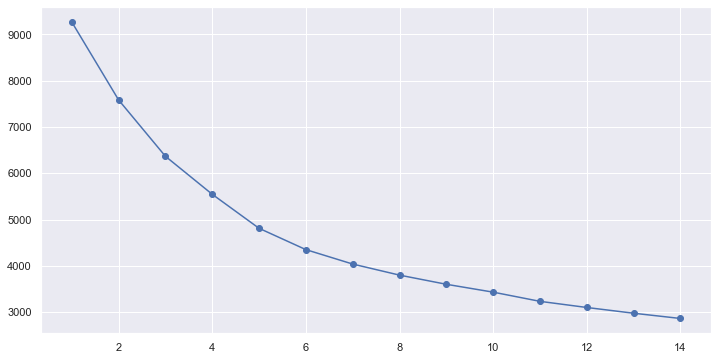

In [775]:
# Elbow plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [776]:
kmeans = KMeans(n_clusters= 6) # As the change in graph can be ssen at 6, hence 6 clusters
kmeans.fit(concrete_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [777]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[173 135 189  56 279 198]


In [778]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_z))
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.751902,-0.575321,1.235975,-0.454521,0.303138,0.909182,-0.035223,-0.410360,-0.718510
1,0.662042,0.173878,-0.847144,2.124949,-1.039143,-0.550724,-1.821830,0.768545,0.372518
2,-0.633477,1.679679,-0.847144,0.508360,-0.775907,0.290013,-0.884682,-0.344203,-0.523968
3,0.639056,1.123702,-0.796173,-0.589924,0.722340,-0.289021,-0.325163,-0.163588,1.307730
4,0.414695,-0.856888,-0.847144,0.438315,-1.003155,0.513592,0.334708,-0.128895,-0.644316
5,-0.596212,-0.545379,1.053393,-0.911206,0.500339,0.759825,0.452814,0.333602,0.664840
6,1.407772,0.239941,-0.847144,-1.546881,1.887899,-1.309009,1.316979,-0.167478,1.087597
7,0.336440,-0.179507,0.759473,0.741720,0.266922,-1.348177,-0.379282,-0.292107,0.165125
8,-0.655014,-0.829831,0.973992,-0.107851,0.226989,-0.239387,1.122820,-0.294304,-0.766198
9,0.311189,0.002290,-0.847144,1.631979,-1.039143,-0.294734,-0.938814,4.540302,0.498177


In [779]:
concrete = concrete.loc[:, 'cement':'strength']
concrete_z = concrete.apply(zscore)

cluster = KMeans( n_clusters = 6, random_state =1)
cluster.fit(concrete_z)

prediction=cluster.predict(concrete_z)
concrete_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

concrete_z_copy = concrete_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243B67F4668>,
      dtype=object)

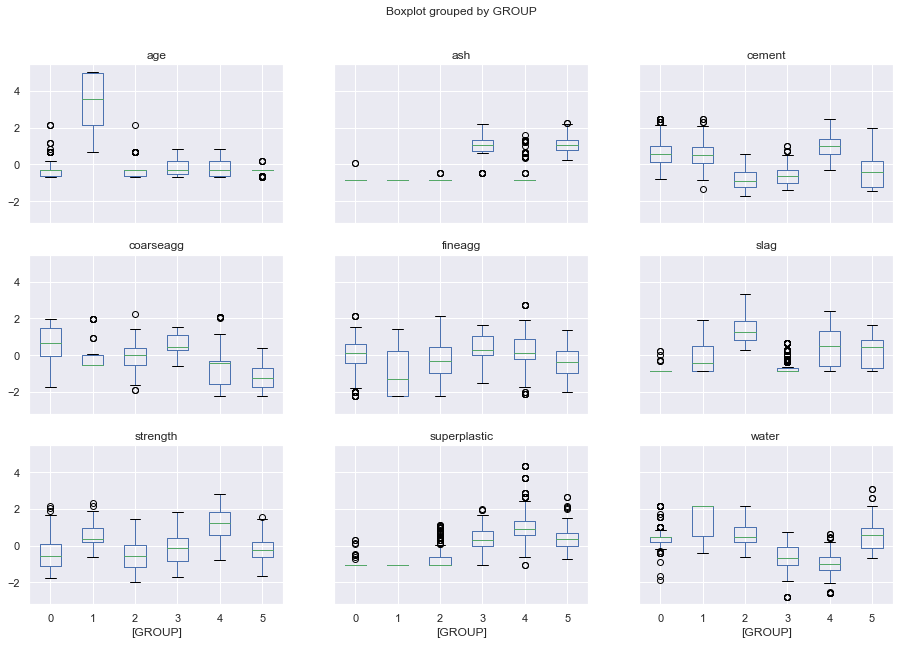

In [780]:
import matplotlib.pylab as plt

concrete_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

In [781]:
# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now

In [783]:
## Identifying and handling outliers

# Addressing outliers at group level

data = concrete_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(concrete_z['GROUP']))

C:\Users\Mrinalini\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243B69B4E48>,
      dtype=object)

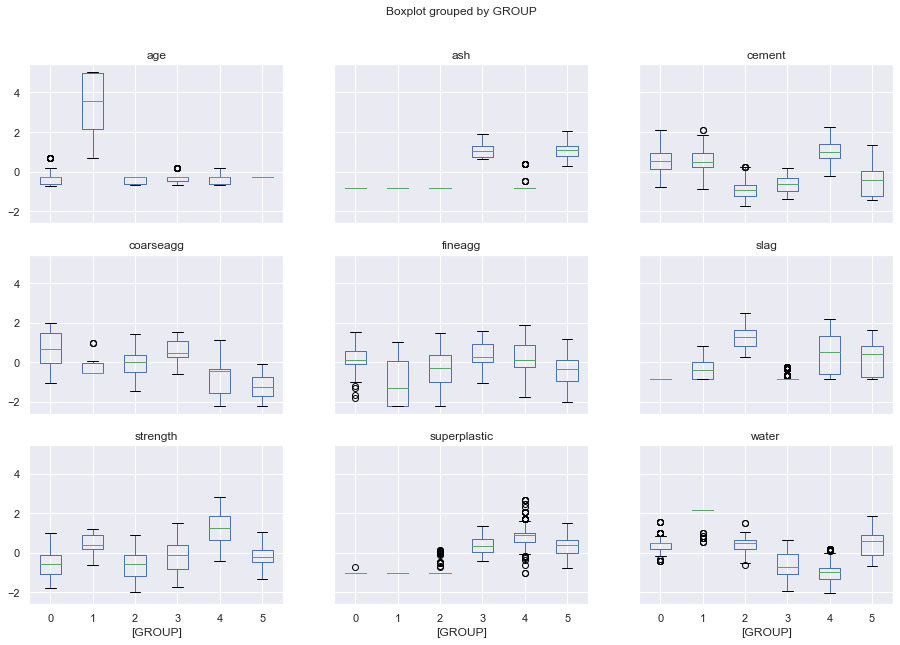

In [784]:
concat_data.boxplot(by = 'GROUP', layout=(3,3), figsize=(15, 10))

In [785]:
# Let us analyze the strength column vs other columns group wise. 

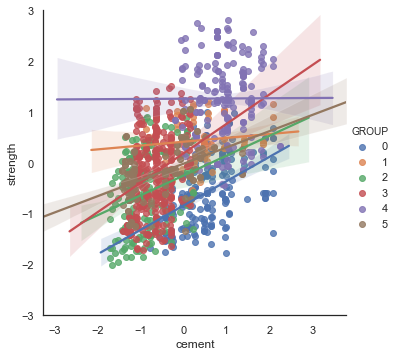

In [786]:
#strength Vs cement

var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

# 5th cluster shows parallel line hence a poor estimator
# First cluster somewhat shows more the cement more the strength
# Overall not a goo estimator

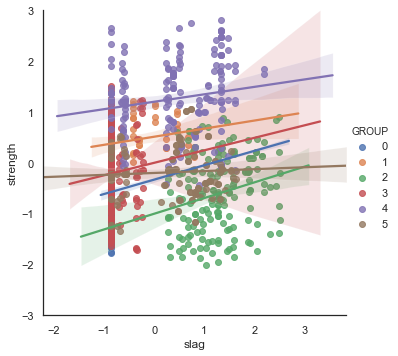

In [787]:
# Strength Vs Slag

var = 'slag'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

# Few of the clusters show poor performance
# Third cluster shows somewhat proportionality between the features.
# Overall poor estimator

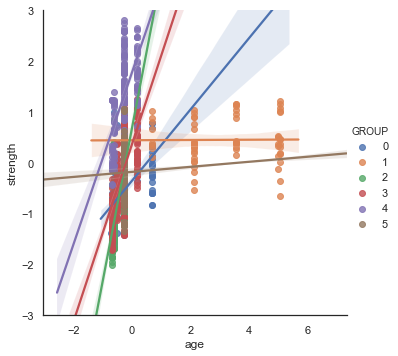

In [788]:
# Strength Vs Age

var = 'age'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

# Looks like age is the poorest of all

In [790]:
Pooreststrength = concat_data[concat_data['GROUP']==0]
Poorerstrength = concat_data[concat_data['GROUP']==1]
Poorstrength = concat_data[concat_data['GROUP']==2]
Goodstrength = concat_data[concat_data['GROUP']==0]
Betterstrength = concat_data[concat_data['GROUP']==1]
Beststrength = concat_data[concat_data['GROUP']==2]

C:\Users\Mrinalini\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mrinalini\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


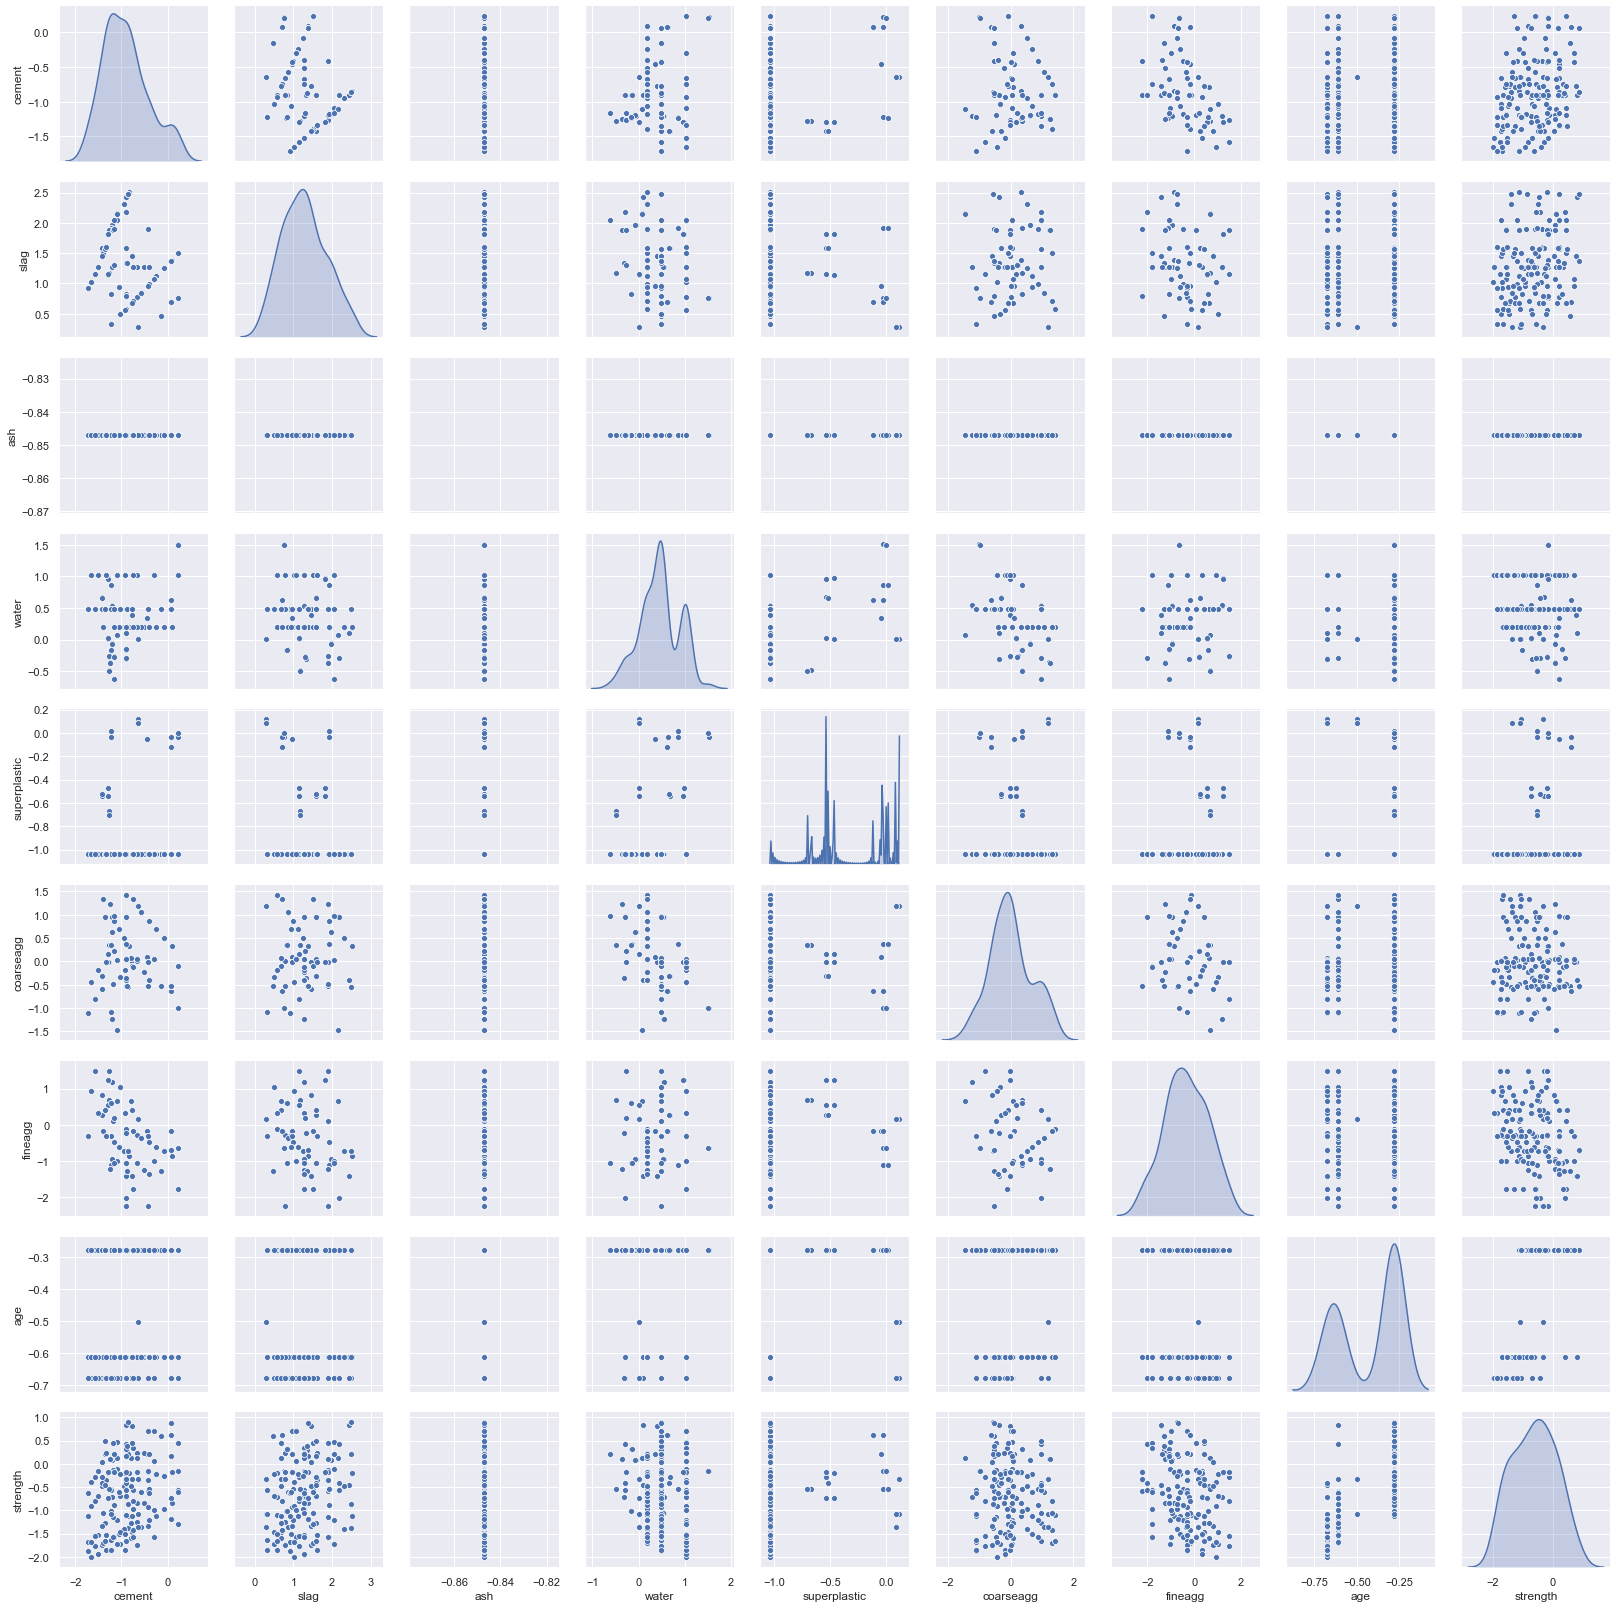

In [791]:
concrete_z= Poorstrength.iloc[:, 0:9]   # Looking for model performance for a particular strength type.

sns.pairplot(concrete_z, diag_kind='kde')   # to plot density curve instead of histogram

# 4a) Algorithms suitable for this project

In [816]:
concrete.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [817]:
concrete_z=concrete.apply(zscore)

In [818]:
X = concrete_z.drop('strength' , axis = 1)
y = concrete_z[['strength']]

In [819]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=1)

In [820]:
print(X_test.shape)
print(y_test.shape)

(309, 8)
(309, 1)


In [821]:
dt_model = DecisionTreeRegressor()

In [822]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

# 3) Obtain feature importance for the individual features and present your findings

In [823]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

# Cement, age and water have higher importance compared to other features.

                   Imp
cement        0.355745
slag          0.096096
ash           0.012507
water         0.122054
superplastic  0.017036
coarseagg     0.030066
fineagg       0.033271
age           0.333225


In [824]:
dt_model.score(X_test, y_test)

0.8575358252314829

In [825]:
dt_model.score(X_train, y_train)

0.9948592395522299

In [826]:
# Dropping useless columns

drop_cols = ['ash' , 'coarseagg' , 'fineagg' , 'superplastic' , 'strength']

X = concrete_z.drop(labels= drop_cols , axis = 1)

In [827]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [828]:
dt_model = DecisionTreeRegressor()

In [829]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [830]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

             Imp
cement  0.392817
slag    0.112892
water   0.157368
age     0.336922


In [831]:
dt_model.score(X_test, y_test)

0.8467102019121382

In [832]:
dt_model.score(X_train, y_train)

0.993459432259283

In [ ]:
# Since the model is overfitting, we will deploy following techniqiues to reduce overfitting of the model.

# 4b) Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

In [834]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [835]:
gbmTree = GradientBoostingRegressor(n_estimators=50)
gbmTree.fit(X_train,y_train)
print("gbmTree on training" , gbmTree.score(X_train, y_train))
print("gbmTree on test data ",gbmTree.score(X_test,y_test))

gbmTree on training 0.9051183122555869
gbmTree on test data  0.8506031132511978


C:\Users\Mrinalini\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [836]:
bgcl = BaggingRegressor(n_estimators=50, oob_score= True)
bgcl = bgcl.fit(X_train,y_train)
print("bgcl on train data ", bgcl.score(X_train,y_train))
print("bgcl on test data ", bgcl.score(X_test,y_test))
print("out of bag score" , bgcl.oob_score_)

bgcl on train data  0.9798111305284956
bgcl on test data  0.8929057598808192
out of bag score 0.8855740329454539


C:\Users\Mrinalini\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [837]:
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X_train,y_train)
print("rfTree on train data ", rfTree.score(X_train,y_train))
print("rfTree on test data ", rfTree.score(X_test,y_test))

rfTree on train data  0.9795653785943312
rfTree on test data  0.8910077246106438


C:\Users\Mrinalini\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
# From above figures we can see the we have reduced overfitting toa greatlevel and model has also scored well in testing.

# 4c) Model performance range at 95% confidence level

In [838]:
concrete_XY = X.join(y)

In [839]:
# configure bootstrap



values = concrete_XY.values

n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(concrete_z) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	gbmTree = GradientBoostingRegressor(n_estimators=50)
	gbmTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = gbmTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = gbmTree.score(test[:, :-1] , y_test)

	stats.append(score)

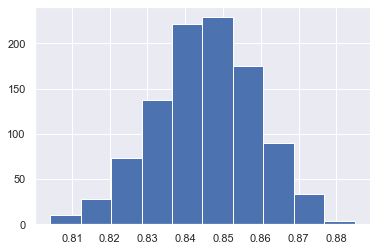

95.0 confidence interval 81.7% and 87.0%


In [840]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [841]:
# configure bootstrap

n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(concrete_z) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration

for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fit model
	rfTree = RandomForestRegressor(n_estimators=50)  
	rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

	rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = rfTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = rfTree.score(test[:, :-1] , y_test)

	stats.append(score)

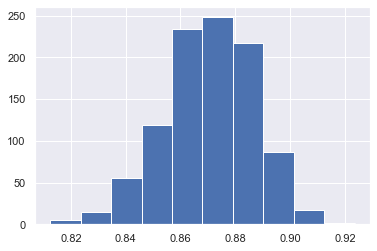

95.0 confidence interval 83.7% and 90.0%


In [842]:
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#  Model Tuning using hyper parameters for further improving model performance

In [854]:
from pprint import pprint

In [855]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1)

In [856]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [880]:
y = concrete_z[['strength']]
X = concrete_z.drop("strength" , axis = 1)

In [881]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=1)

In [882]:
# RandomSearchCV

In [883]:
import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [884]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [885]:
# Using the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# searching across 100 different combinations, and usimg all available cores

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
C:\Users\Mrinalini\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [886]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [887]:
best_random = rf_random.best_estimator_   # best ensemble model (with optimal combination of hyperparameters)

In [888]:
best_random.score(X_test , y_test)

0.8882696933452411

In [889]:
# GridSearchCV

In [890]:
from sklearn.model_selection import GridSearchCV

In [891]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
} 

In [892]:
rf = RandomForestRegressor(random_state = 1)

In [893]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [894]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

C:\Users\Mrinalini\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mrinalini\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mrinalini\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mrinalini\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A co

In [895]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 7}

In [896]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test, y_test)

0.805146013651073

In [ ]:
# The accuracy is relatively lower as we have severly restricted the hyper parameter ranges. This was done to minimize 
# execution time. The Girdsearch has lower probability of finding the best combination than the randomsearch